In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
from astropy.io import fits
from astropy import table
from astLib import astWCS
import math
from nemo import completeness, MockSurvey

import sys
sys.path.append('../')
import nemo_mocks
import imp
imp.reload(nemo_mocks)

<module 'nemo_mocks' from '../nemo_mocks.py'>

In [2]:
h = 0.68

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=100.*h, ombh2=0.049*h**2, omch2=(0.31-0.049)*h**2, mnu=0.0, omk=0, tau=0.055)
pars.InitPower.set_params(As=0.81**2/0.8104862**2*2.022662e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

#calculate results for these parameters
results = camb.get_results(pars)

#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.], kmax=2.0)

#Linear spectra
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

[0.81]


In [3]:
h = 0.68

params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data ='../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14*0.68
    },
    'selfunc': {
        'SNRcut': 5.,
        'single_tile_test': "no",
        'mode': 'injection',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': False,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 5e13*0.68,
            'Mmax': 1e16*0.68,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Initializing binned_clusters_test.py
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
Reading data catalog.
Total number of clusters in catalogue = 5738.
SNR cut = 5.0.
Number of clusters above the SNR cut = 3169.
The highest redshift = 1.9649999999999999
Number of redshift bins = 28.
Number of mass bins for theory calculation 106.
The lowest SNR = 5.000186060313553.
The highest SNR = 51.98994565380555.
Number of SNR bins = 6.
Edges of SNR bins = [  3.98107171   7.07945784  12.58925412  22.38721139  39.81071706
  70.79457844 125.89254118].
Loading files describing selection function.
Reading Q as a function of theta.
/Users/andrina/opt/miniconda3/envs/actxdes_venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
Reading RMS.
Entire survey area = 13631.324739141011 deg2.


 Nz for higher resolution =  249
0 2006.563694691172
1 937.2165352071047
2 193.03116141340737
3 32.54368983255846


Number of clusters in redshift bin 0: 83.0416825807752.
Number of clusters in redshift bin 1: 356.0746647316823.
Number of clusters in redshift bin 2: 468.21815504227874.
Number of clusters in redshift bin 3: 482.57689738279237.
Number of clusters in redshift bin 4: 433.4956501551501.
Number of clusters in redshift bin 5: 361.2016867849723.
Number of clusters in redshift bin 6: 285.2339834072963.
Number of clusters in redshift bin 7: 213.81479043345266.
Number of clusters in redshift bin 8: 156.08771877737286.
Number of clusters in redshift bin 9: 110.04879071506166.
Number of clusters in redshift bin 10: 75.58916829193409.
Number of clusters in redshift bin 11: 50.452747005873036.
Number of clusters in redshift bin 12: 33.55840093995295.
Number of clusters in redshift bin 13: 22.29549424111281.
Number of clusters in redshift bin 14: 14.673266096436107.
Number of clusters in redshift bin 15: 9.576326773650209.
Number of clusters in redshift bin 16: 6.258987405791237.
Number of clusters

4 3.70733083479444
5 0.22271398222826888
 Total predicted 2D N =  3173.285125961265
 ::: 2D ln likelihood =  185.27065673191657


array([-185.27065673])

In [4]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [5]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

0 2006.563694691172
1 937.2165352071047
2 193.03116141340737
3 32.54368983255846


Number of clusters in redshift bin 0: 83.0416825807752.
Number of clusters in redshift bin 1: 356.0746647316823.
Number of clusters in redshift bin 2: 468.21815504227874.
Number of clusters in redshift bin 3: 482.57689738279237.
Number of clusters in redshift bin 4: 433.4956501551501.
Number of clusters in redshift bin 5: 361.2016867849723.
Number of clusters in redshift bin 6: 285.2339834072963.
Number of clusters in redshift bin 7: 213.81479043345266.
Number of clusters in redshift bin 8: 156.08771877737286.
Number of clusters in redshift bin 9: 110.04879071506166.
Number of clusters in redshift bin 10: 75.58916829193409.
Number of clusters in redshift bin 11: 50.452747005873036.
Number of clusters in redshift bin 12: 33.55840093995295.
Number of clusters in redshift bin 13: 22.29549424111281.
Number of clusters in redshift bin 14: 14.673266096436107.
Number of clusters in redshift bin 15: 9.576326773650209.
Number of clusters in redshift bin 16: 6.258987405791237.
Number of clusters

4 3.70733083479444
5 0.22271398222826888
 Total predicted 2D N =  3173.285125961265


In [6]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [7]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']


zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [8]:
mockconfig = {
    'predSNRCut': 5,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'fast',
    'QSource': 'fit'
}

In [9]:
# Make a 'true' mock - use the truth catalog, get true_SNR by looking up noise in the selFn dir
mode = 'without_Q'
truthTab = nemo_mocks.make_truth_mock(mode, mockconfig)

In [10]:
truth_cat, zarr, qarr = nemo_mocks.bin_catalog(truthTab[truthTab['true_SNR']>5], zbins, qbins, SNR_tag='true_SNR')

In [11]:
mockTab = nemo_mocks.make_nemo_mock(mockconfig)

In [12]:
mock_cat, zarr, qarr = nemo_mocks.bin_catalog(mockTab[mockTab['fixed_SNR']>5], zbins, qbins, SNR_tag='fixed_SNR')

In [13]:
Nq_truth = np.zeros(len(q))

for i in range(len(q)):
    Nq_truth[i] = truth_cat[:,i].sum()    

In [14]:
Nz_truth = np.zeros(len(z))

for i in range(len(z)):
    Nz_truth[i] = truth_cat[i,:].sum() 

In [15]:
Nq_mock = np.zeros(len(q))

for i in range(len(q)):
    Nq_mock[i] = mock_cat[:,i].sum()    

In [16]:
Nz_mock = np.zeros(len(z))

for i in range(len(z)):
    Nz_mock[i] = mock_cat[i,:].sum() 

In [17]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

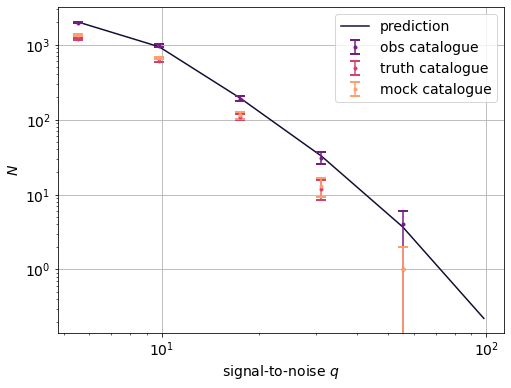

In [18]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], label='prediction')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(q, Nq_truth, yerr=np.sqrt(Nq_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(q, Nq_mock, yerr=np.sqrt(Nq_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [19]:
mockconfig_pred = {
    'predSNRCut': 5,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'injection',
    'QSource': 'injection'
}

In [20]:
predNz = nemo_mocks.get_nemo_pred(mockconfig_pred , zbins)

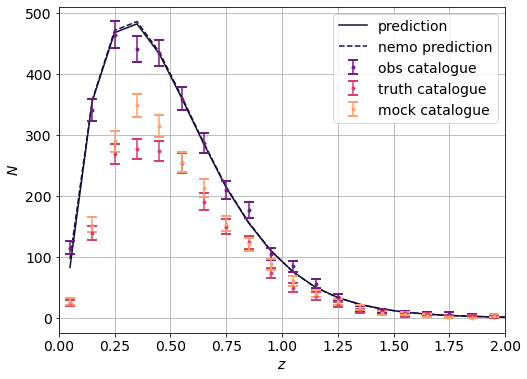

In [21]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


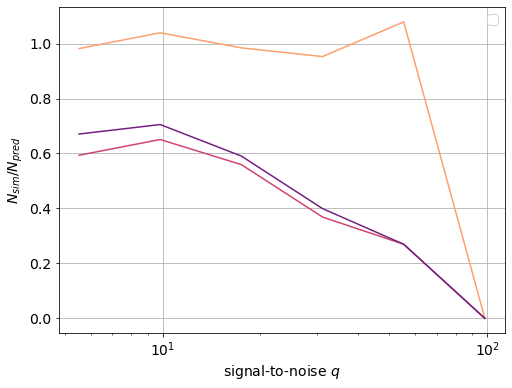

In [22]:
plt.figure(figsize=(8,6))
plt.semilogx(q, catNq/Nq, color=color_list[12])
plt.semilogx(q, Nq_truth/Nq, color=color_list[8])
plt.semilogx(q, Nq_mock/Nq, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


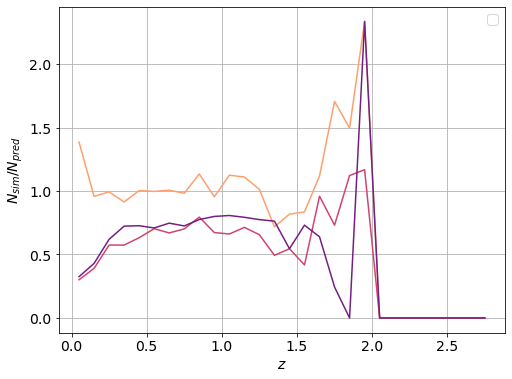

In [23]:
plt.figure(figsize=(8,6))
plt.plot(z, catNz/Nz, color=color_list[12])
plt.plot(z, Nz_truth/Nz, color=color_list[8])
plt.plot(z, Nz_mock/Nz, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [27]:
h = 0.68

params = {
    'h': 0.68,
    'n_s': 0.965,
    'Omega_b': 0.049,      
    'Omega_c': 0.26, 
    'sigma8': 0.81,
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'm_nu': 0.0,
    'C0': 2.

}

path2data ='../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'\
'NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/'

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
    'verbose': True,
    'data': {
        'data_path': path2data,
        'cat_file': "NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_mass.fits",
        'Q_file': "selFn/QFit.fits",
        'tile_file': "selFn/tileAreas.txt",
        'rms_file': "selFn/RMSTab.fits"
    },
    'theorypred': {
        'choose_theory': "CCL",
        'massfunc_mode': 'ccl',
        'choose_dim': "2D",
        'compl_mode': 'erf_diff',
        'md_hmf': '200c',
        'md_ym': '200c'
        
    },
    'YM': {
        'Mpivot': 4.25e14*0.68
    },
    'selfunc': {
        'SNRcut': 7.,
        'single_tile_test': "no",
        'mode': 'injection',
        'dwnsmpl_bins': 50,
        'save_dwsmpld': False,
        'average_Q': False
    },
    'binning': {
        'z': {
            # redshift setting
            'zmin': 0.,
            'zmax': 2.8,
            'dz': 0.1
        },
        'q': {
            # SNR setting
            'log10qmin': 0.6,
            'log10qmax': 2.0,
            'dlog10q': 0.25
        },
        'M': {
            # mass setting
            'Mmin': 5e13*0.68,
            'Mmax': 1e16*0.68,
            'dlogM': 0.05
        }
    }
    }},
    'theory': {'soliket.binned_clusters.CCL': 
               {'transfer_function': 'boltzmann_camb',
                'matter_pk': 'halofit',
                'baryons_pk': 'nobaryons',
                'md_hmf': '200c'}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Initializing binned_clusters_test.py
Considering full map.
Considering full map.
Considering full map.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
2D likelihood as a function of redshift and signal-to-noise.
Reading data catalog.
Reading data catalog.
Reading data catalog.
Total number of clusters in catalogue = 5738.
Total number of clusters in catalogue = 5738.
Total number of clusters in catalogue = 5738.
SNR cut = 7.0.
SNR cut = 7.0.
SNR cut = 7.0.
Number of clusters above the SNR cut = 1227.
Number of clusters above the SNR cut = 1227.
Number of clusters above the SNR cut = 1227.
The highest redshift = 1.935
The highest redshift = 1.935
The highest redshift = 1.935
Number of redshift bins = 28.
Number of redshift bins = 28.
Number of redshift bins = 28.
Number of mass bins for theory calculation 106.
Number of mass bins for theory 

 Nz for higher resolution =  249
0 38.130629066286886
1 937.2165352071047
2 193.03116141340737
3 32.54368983255846
4 3.70733083479444


Number of clusters in redshift bin 0: 35.55932691568533.
Number of clusters in redshift bin 0: 35.55932691568533.
Number of clusters in redshift bin 0: 35.55932691568533.
Number of clusters in redshift bin 1: 158.7682526557981.
Number of clusters in redshift bin 1: 158.7682526557981.
Number of clusters in redshift bin 1: 158.7682526557981.
Number of clusters in redshift bin 2: 199.54759560218025.
Number of clusters in redshift bin 2: 199.54759560218025.
Number of clusters in redshift bin 2: 199.54759560218025.
Number of clusters in redshift bin 3: 193.48091207341525.
Number of clusters in redshift bin 3: 193.48091207341525.
Number of clusters in redshift bin 3: 193.48091207341525.
Number of clusters in redshift bin 4: 165.55410737690264.
Number of clusters in redshift bin 4: 165.55410737690264.
Number of clusters in redshift bin 4: 165.55410737690264.
Number of clusters in redshift bin 5: 133.1729391014308.
Number of clusters in redshift bin 5: 133.1729391014308.
Number of clusters in 

5 0.22271398222826888
 Total predicted 2D N =  1204.85206033638
 ::: 2D ln likelihood =  143.02361707382096


array([-143.02361707])

In [28]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 1.9e-05,
    'B0': 0.08,
    'C0': 2.,
    'scatter_sz': 0.,
    'bias_sz': 1.  
}

In [29]:
Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
    Nq[i] = Nzq[:,i].sum()    
    catNq[i] = catNzq[:,i].sum()

0 38.130629066286886
1 937.2165352071047
2 193.03116141340737
3 32.54368983255846
4 3.70733083479444


Number of clusters in redshift bin 0: 35.55932691568533.
Number of clusters in redshift bin 0: 35.55932691568533.
Number of clusters in redshift bin 0: 35.55932691568533.
Number of clusters in redshift bin 1: 158.7682526557981.
Number of clusters in redshift bin 1: 158.7682526557981.
Number of clusters in redshift bin 1: 158.7682526557981.
Number of clusters in redshift bin 2: 199.54759560218025.
Number of clusters in redshift bin 2: 199.54759560218025.
Number of clusters in redshift bin 2: 199.54759560218025.
Number of clusters in redshift bin 3: 193.48091207341525.
Number of clusters in redshift bin 3: 193.48091207341525.
Number of clusters in redshift bin 3: 193.48091207341525.
Number of clusters in redshift bin 4: 165.55410737690264.
Number of clusters in redshift bin 4: 165.55410737690264.
Number of clusters in redshift bin 4: 165.55410737690264.
Number of clusters in redshift bin 5: 133.1729391014308.
Number of clusters in redshift bin 5: 133.1729391014308.
Number of clusters in 

5 0.22271398222826888
 Total predicted 2D N =  1204.85206033638


In [30]:
Nz = np.zeros(len(z))
catNz = np.zeros(len(z))
for i in range(len(z)):
    Nz[i] = Nzq[i, :].sum()    
    catNz[i] = catNzq[i, :].sum()

In [31]:
bin_params = info['likelihood']['soliket.BinnedClusterLikelihood']['binning']


zbins = np.arange(bin_params['z']['zmin'], bin_params['z']['zmax'] + bin_params['z']['dz'], \
                  bin_params['z']['dz'])

logqmin = bin_params['q']['log10qmin']
logqmax = bin_params['q']['log10qmax']
dlogq = bin_params['q']['dlog10q']

# TODO: I removed the bin where everything is larger than qmax - is this ok?
qbins = 10**np.arange(logqmin, logqmax+dlogq, dlogq)

In [34]:
mockconfig = {
    'predSNRCut': 7,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'fast',
    'QSource': 'fit'
}

In [35]:
# Make a 'true' mock - use the truth catalog, get true_SNR by looking up noise in the selFn dir
mode = 'without_Q'
truthTab = nemo_mocks.make_truth_mock(mode, mockconfig)

In [36]:
truth_cat, zarr, qarr = nemo_mocks.bin_catalog(truthTab[truthTab['true_SNR']>7], zbins, qbins, SNR_tag='true_SNR')

In [37]:
mockTab = nemo_mocks.make_nemo_mock(mockconfig)

In [38]:
mock_cat, zarr, qarr = nemo_mocks.bin_catalog(mockTab[mockTab['fixed_SNR']>7], zbins, qbins, SNR_tag='fixed_SNR')

In [39]:
Nq_truth = np.zeros(len(q))

for i in range(len(q)):
    Nq_truth[i] = truth_cat[:,i].sum()    

In [40]:
Nz_truth = np.zeros(len(z))

for i in range(len(z)):
    Nz_truth[i] = truth_cat[i,:].sum() 

In [41]:
Nq_mock = np.zeros(len(q))

for i in range(len(q)):
    Nq_mock[i] = mock_cat[:,i].sum()    

In [42]:
Nz_mock = np.zeros(len(z))

for i in range(len(z)):
    Nz_mock[i] = mock_cat[i,:].sum() 

In [43]:
color_list = plt.cm.magma(np.linspace(0.1,0.8,13))

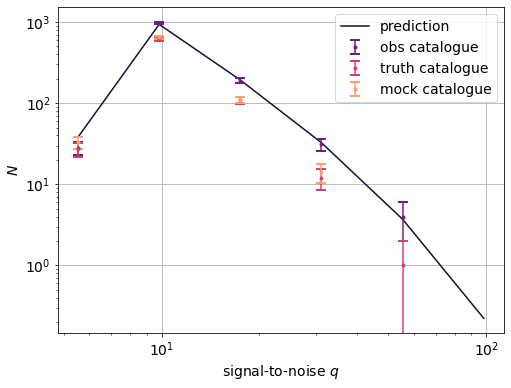

In [44]:
plt.figure(figsize=(8,6))
plt.plot(q, Nq, color=color_list[0], label='prediction')
plt.errorbar(q, catNq, yerr=np.sqrt(catNq), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(q, Nq_truth, yerr=np.sqrt(Nq_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(q, Nq_mock, yerr=np.sqrt(Nq_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [45]:
mockconfig_pred = {
    'predSNRCut': 7,
    'path2truthcat': '../../../../../data/sims/sim-kit_NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned/NemoCCL_A10tSZ_DR5White_ACT-DR5_tenToA0Tuned_truthCatalog.fits',
    'path2noisemap': path2data+'selFn/stitched_RMSMap_Arnaud_M2e14_z0p4.fits',
    'path2selFn': path2data+'selFn',
    'path2Qfunc': path2data+'selFn/QFit.fits',
    'relativisticCorrection': False,
    'rhoType': 'critical',
    'massFunc': 'Tinker08',
    'delta': 200,
    'applyPoissonScatter': False,
    'predAreaScale': 1.000, 
    'makeMock': True,
    'selFnZStep': 0.01,
    'method': 'injection',
    'QSource': 'injection'
}

In [46]:
predNz = nemo_mocks.get_nemo_pred(mockconfig_pred, zbins)

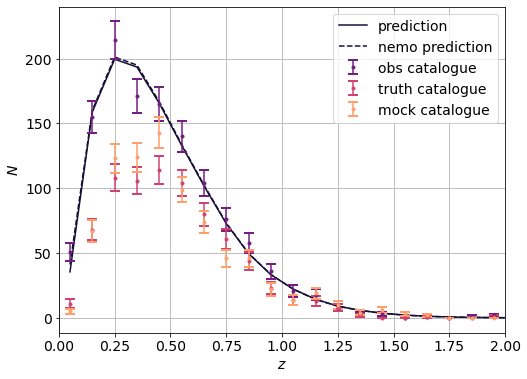

In [47]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz, color=color_list[0], label='prediction')
plt.plot(z, predNz, color=color_list[0], linestyle='--', label='nemo prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color=color_list[4], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='obs catalogue')
plt.errorbar(z, Nz_truth, yerr=np.sqrt(Nz_truth), color=color_list[8], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='truth catalogue')
plt.errorbar(z, Nz_mock, yerr=np.sqrt(Nz_mock), color=color_list[12], fmt='o', ms=3, capsize=5, \
             capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xlim(0, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


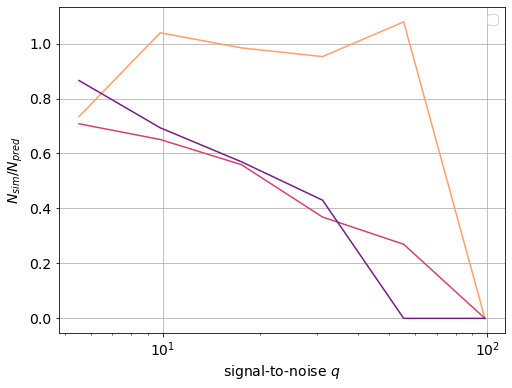

In [48]:
plt.figure(figsize=(8,6))
plt.semilogx(q, catNq/Nq, color=color_list[12])
plt.semilogx(q, Nq_truth/Nq, color=color_list[8])
plt.semilogx(q, Nq_mock/Nq, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

[matplotlib.legend] *WARNING* No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


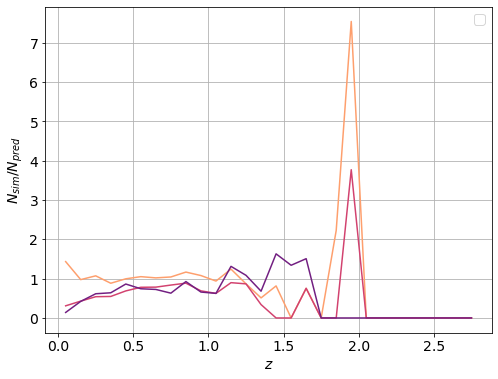

In [49]:
plt.figure(figsize=(8,6))
plt.plot(z, catNz/Nz, color=color_list[12])
plt.plot(z, Nz_truth/Nz, color=color_list[8])
plt.plot(z, Nz_mock/Nz, color=color_list[4])
# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$N_{sim}/N_{pred}$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()